In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path = '/home/matthew/Downloads/Accenture/Task 2/Cleaned Dataset.xlsx'

In [12]:
df=pd.read_excel(path)

In [13]:
df.head()

,Content ID,User ID,Type,Category,Age,Location,Reaction Type,Reaction Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,13.0,"1950 Michael Mill\nLindashire, KY 08693",disgust,0.0
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,13.0,Unit 3999 Box 7280\nDPO AP 36681,dislike,10.0
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,5.0,"PSC 8837, Box 6590\nAPO AE 71776",hate,5.0
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,0.0,"703 Brandy Road\nFisherborough, ND 30873",worried,12.0
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,31.0,"18111 Jones Spurs Suite 756\nNew Lauren, PA 29244",scared,15.0


In [14]:
df=df.drop(['Content ID','User ID'], axis=1)

In [15]:
df.head()

,Type,Category,Age,Location,Reaction Type,Reaction Score
0,photo,Studying,13.0,"1950 Michael Mill\nLindashire, KY 08693",disgust,0.0
1,photo,healthy eating,13.0,Unit 3999 Box 7280\nDPO AP 36681,dislike,10.0
2,photo,healthy eating,5.0,"PSC 8837, Box 6590\nAPO AE 71776",hate,5.0
3,photo,technology,0.0,"703 Brandy Road\nFisherborough, ND 30873",worried,12.0
4,video,food,31.0,"18111 Jones Spurs Suite 756\nNew Lauren, PA 29244",scared,15.0


In [16]:
df.columns

Index(['Type', 'Category', 'Age', 'Location', 'Reaction Type',
       'Reaction Score'],
      dtype='object')

In [21]:
df['Category'].unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

In [20]:
df['Category']=df['Category'].apply(lambda x:x.lower())

In [35]:
category=df.groupby('Category')['Reaction Score'].sum().sort_values(ascending=False)

In [36]:
len(category)*0.3

4.8

In [39]:
category=category[:5]

In [42]:
category

Category
travel        2905.0
culture       2822.0
science       2603.0
technology    2567.0
fitness       2500.0
Name: Reaction Score, dtype: float64

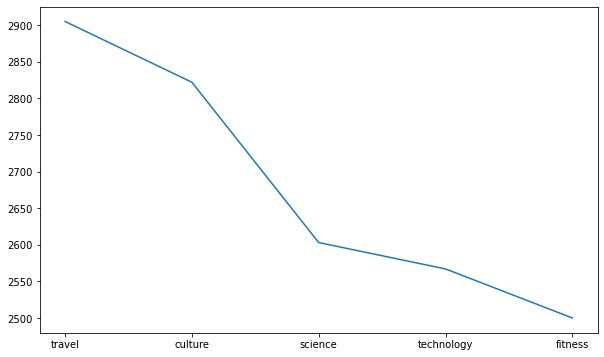

In [40]:
plt.figure(figsize=(10,6))
plt.plot(category.index, category.values)

In [51]:
df_top_5=df[(df['Category']=='travel') | (df['Category']=='culture') | (df['Category']=='science') | (df['Category']=='technology') | (df['Category']=='fitness')]

In [52]:
df_top_5

,Type,Category,Age,Location,Reaction Type,Reaction Score
3,photo,technology,0.0,"703 Brandy Road\nFisherborough, ND 30873",worried,12.0
7,video,technology,1.0,"890 Mikayla Ferry\nMaryport, KY 28636",want,70.0
10,GIF,science,27.0,"274 Deleon Estates\nLake Jennifer, TX 07214",super love,75.0
13,audio,travel,35.0,"40960 Shaffer Extensions Suite 928\nPerezberg,...",intrigued,45.0
14,GIF,fitness,20.0,"6967 Gonzalez Roads Suite 288\nLake Rose, DC 6...",interested,30.0
...,...,...,...,...,...,...
951,video,fitness,0.0,737 Frederick Squares Suite 479\nEast Tiffanyh...,indifferent,20.0
956,photo,science,39.0,"3272 Hall Camp Suite 066\nEast Nathanborough, ...",cherish,70.0
958,GIF,technology,38.0,"39270 Linda Wall Apt. 032\nJonesburgh, AZ 55032",intrigued,45.0
960,GIF,culture,20.0,"69010 Clark Tunnel\nAndrewhaven, OK 11456",interested,30.0


In [61]:
df_top_5.groupby('Category')['Reaction Score'].mean()

Category
culture       43.415385
fitness       40.983607
science       38.850746
technology    37.750000
travel        42.101449
Name: Reaction Score, dtype: float64

In [69]:
df_top_5.groupby('Category')['Reaction Score'].sum().sort_values(ascending=False)

Category
travel        2905.0
culture       2822.0
science       2603.0
technology    2567.0
fitness       2500.0
Name: Reaction Score, dtype: float64

In [63]:
df_top_5.groupby('Category')['Reaction Score'].median().sort_values(ascending=False)

Category
travel        50.0
culture       45.0
fitness       45.0
science       35.0
technology    35.0
Name: Reaction Score, dtype: float64

In [64]:
order=['travel', 'culture', 'fitness', 'science','technology']

Text(0.5, 1.0, 'Minimum, First quartile [Q1], Median, Third quartile [Q3] and Maximum')

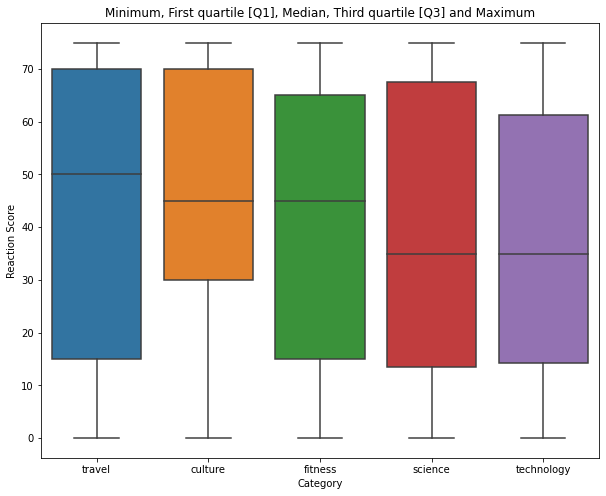

In [65]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_top_5, x='Category', y='Reaction Score', order=order)
plt.title('Minimum, First quartile [Q1], Median, Third quartile [Q3] and Maximum')

<AxesSubplot:xlabel='Category', ylabel='Reaction Score'>

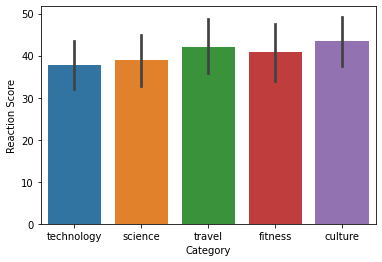

In [67]:
sns.barplot(data=df_top_5, x='Category', y='Reaction Score')

Text(0.5, 1.0, 'SUM of Reaction score per Category')

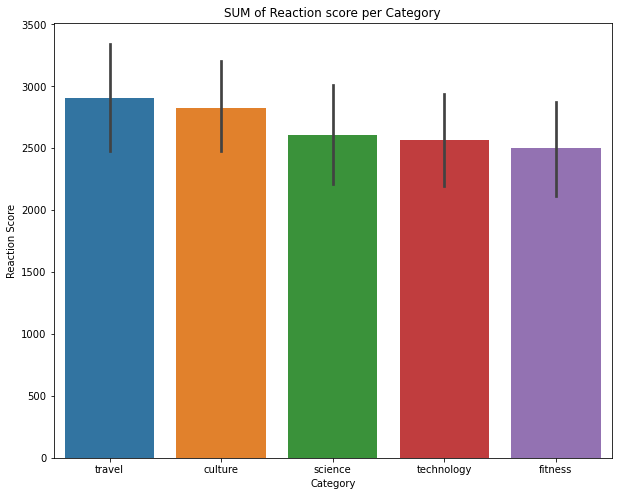

In [71]:
plt.figure(figsize=(10,8))
sns.barplot(data=df_top_5, x='Category', y='Reaction Score', estimator=np.sum, order=['travel','culture','science','technology','fitness'])
plt.title('SUM of Reaction score per Category')

In [74]:
top_5=pd.DataFrame(df_top_5.groupby('Category')['Reaction Score'].sum().sort_values(ascending=False)).reset_index()

In [82]:
top_5['Postion']=pd.Series(list(range(1,6)))

In [83]:
top_5

,Category,Reaction Score,Postion
0,travel,2905.0,1
1,culture,2822.0,2
2,science,2603.0,3
3,technology,2567.0,4
4,fitness,2500.0,5


<AxesSubplot:xlabel='Category', ylabel='count'>

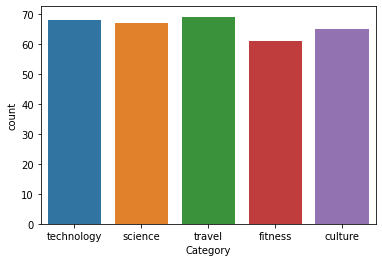

In [85]:
sns.countplot(data=df_top_5, x='Category')

In [86]:
df_top_5['Category'].value_counts()

travel        69
technology    68
science       67
culture       65
fitness       61
Name: Category, dtype: int64